# D209 - Task 2 - Predictive Analysis (with Decision Trees)


---

## Part I: Research Question


### 1.  Propose one question relevant to a real-world organizational situation that you will answer.

We are using a Churn dataset that contains customer information for a telecom company.  In addition to descriptive information, it holds a column for Churn - notating whether or not the customer left for another provider.  What features describe a customer that is likely to leave, and can we determine if someone is likely to leave?  These are the questions we hope to answer this this analysis.



### 2.  Define one goal of the data analysis.

If we can determine which customers are likely to leave, we can work to keep their business.  It is commonly found that aquiring new customers is very costly, so it will be benificial if our company can keep they customers we already have.  This would save losses and improve our over all financial state, as well as help craft a good image because of the customer loyalty.
 


---

## Part II: Method Justification


### 1.  Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.

Decision trees create a "tree" of binary options that split based on feature values and arrive at a leaf node that has a classification assigned to it.  There are a larger number of the way that features could be split, and in addition there are a large number of hyperparameter options, such as max branch length, number of trees to be analyzed, min number of results per leaf, and many others.

The expected outcome is a model that will predict Yes/No for customer churn based on other datapoints that are available in the model.

### 2.  Summarize one assumption of the chosen prediction method.

There are numerous assumptions when using a Decision Tree, including the following:
 - In the beginning, the entire dataset is contained in the root node (Rawale, 2018)
 - Records are distributed recursively, based on attribute values (Rawale, 2018)
 - Decision Trees are better suited to categorical targets, since the leafs will be distinct buckets (Rawale, 2018)



### 3.  List the packages or libraries you have chosen for Python.

We will use Python for the analysis because it is a full functioned language that can be used in standard software development as well.  This makes it well suited for developer that has used other languages before.  It also has a relatively easy to read (and learn) syntax.

We will use the following packages for Python:
 - Numpy (useful math functions and series/list manipulation)
 - Pandas (extremely helpful in storing and manipulating dataframe, including loading and saving CSVs)
 - Matplotlib (for graphical representations)
 - Seaborn (an additional graphical library that provides more developed asthetics)
 - SciKit Learn (an extensive library of data science models and helpful methods)
  - DecisionTreeClassifier (the specific portion that creates a Decision Tree model)
  - train_test_split (allows us to split the dataset for testing)
  - confusion_matrix (to determine a confusion matrix)
  - GridSearchCV (allows the further splitting of data to run the model on different subsets, as well as running through an array of different parameter options to determine the best hyperparameters)



---

## Part III: Data Preparation


### 1.  Describe one data preprocessing goal relevant to the prediction method.

We will begin by removing columns that are not relevant to this analysis.  Then we will check the data for null or otherwise "blank" values.  If any are found, we will have to decide if the records should be removed or if the values should be approximated using the mean or a similar method.  Empty values could throw off the model and leave us with results that are not trustworthy.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns when reviewing
pd.options.display.max_columns = None

# Load the dataset
df = pd.read_csv('churn_clean.csv')
# Review the column names
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [2]:
# Based on the data dictionary, these columns are ids or otherwise irrelevant for models
df.drop(columns=['CaseOrder','Customer_id','Interaction','UID'], inplace=True)

# The location fields can all be represented by the lat long
df.drop(columns=['City','State','County','Zip','TimeZone'], inplace=True)

# Other columns that have too many options to track or are otherwise unusable
df.drop(columns='Job', inplace=True)

In [3]:
# Inspect the datatypes and null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Area                  10000 non-null  object 
 4   Children              10000 non-null  int64  
 5   Age                   10000 non-null  int64  
 6   Income                10000 non-null  float64
 7   Marital               10000 non-null  object 
 8   Gender                10000 non-null  object 
 9   Churn                 10000 non-null  object 
 10  Outage_sec_perweek    10000 non-null  float64
 11  Email                 10000 non-null  int64  
 12  Contacts              10000 non-null  int64  
 13  Yearly_equip_failure  10000 non-null  int64  
 14  Techie                10000 non-null  object 
 15  Contract            

In [4]:
# Grab a sample of the data to make sure we don't spot blanks
df.sample(10)

,Lat,Lng,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
8050,29.89790,-95.17696,45885,Rural,2,74,18809.09,Married,Female,No,5.659416,13,1,0,Yes,One year,No,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Electronic Check,67.563440,255.119800,6555.502175,2,2,4,5,2,4,5,2
402,40.00719,-75.31651,6250,Suburban,3,20,24462.25,Widowed,Female,No,5.304627,13,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Credit Card (automatic),1.379696,184.978458,713.364269,3,3,5,3,6,2,4,3
3244,35.54407,-88.11059,3643,Urban,3,29,20761.50,Separated,Male,Yes,6.827248,9,1,0,No,Month-to-month,No,Yes,None,Yes,No,No,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.645392,137.461600,1037.253154,4,3,4,3,4,2,3,4
2321,42.62514,-90.82169,1346,Urban,1,70,54250.18,Never Married,Male,No,7.828963,10,1,1,No,One year,No,No,None,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Mailed Check,7.458099,172.487100,1065.848768,4,5,4,3,3,4,4,4
7416,37.35748,-81.71673,192,Urban,1,29,59954.40,Widowed,Male,No,9.015432,7,0,0,Yes,Two Year,No,Yes,DSL,Yes,No,No,No,No,No,Yes,No,Yes,Credit Card (automatic),70.773080,117.439200,6550.573563,2,2,4,3,4,3,3,4
8389,33.47662,-89.44680,650,Urban,2,35,17300.45,Widowed,Nonbinary,No,6.275178,14,2,0,No,Month-to-month,Yes,No,None,Yes,No,No,No,No,No,No,No,No,Mailed Check,56.435720,79.978860,4726.723807,3,2,2,5,2,4,3,4
2783,33.01613,-108.94880,114,Rural,2,88,58508.34,Widowed,Male,No,9.216770,12,0,0,No,Month-to-month,No,No,None,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Credit Card (automatic),18.944290,210.138000,2087.462333,3,4,4,3,3,2,3,5
2999,44.19138,-75.94969,3108,Rural,2,59,66148.83,Separated,Male,Yes,7.718284,12,1,0,No,Month-to-month,No,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Electronic Check,3.000251,235.137200,1374.762505,3,2,3,4,2,3,3,5
3850,39.39269,-104.02850,492,Rural,3,85,72791.51,Separated,Female,No,9.218716,12,2,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Bank Transfer(automatic),5.446201,179.965600,589.698198,3,3,4,4,4,3,4,2
1241,38.62586,-90.26699,18208,Suburban,3,88,73646.38,Divorced,Male,No,7.568123,14,1,0,No,Two Year,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Yes,No,No,Electronic Check,8.000279,172.440432,1441.176168,3,3,4,4,3,4,3,3


>There do not appear to be any missing values that we need to handle.

### 2.  Identify the initial data set variables that you will use to perform the analysis, and group each variable as continuous or categorical. 

Based on the sample above and the datatypes we can conclude that the variables are as follows -

|Variable|Cont/Cat|Type|
|---|---|---|
|Lat|Continuous|Independent|
|Lng|Continuous|Independent|
|Population|Continuous|Independent|
|Area|Categorical|Independent|
|Children|Continuous|Independent|
|Age|Continuous|Independent|
|Income|Continuous|Independent|
|Marital|Categorical|Independent|
|Gender|Categorical|Independent|
|Churn|Categorical|**Dependent**|
|Outage_sec_perweek|Continuous|Independent|
|Email|Continuous|Independent|
|Contacts|Continuous|Independent|
|Yearly_equip_failure|Continuous|Independent|
|Techie|Categorical|Independent|
|Contract|Categorical|Independent|
|Port_modem|Categorical|Independent|
|Tablet|Categorical|Independent|
|InternetService|Categorical|Independent|
|Phone|Categorical|Independent|
|Multiple|Categorical|Independent|
|OnlineSecurity|Categorical|Independent|
|OnlineBackup|Categorical|Independent|
|DeviceProtection|Categorical|Independent|
|TechSupport|Categorical|Independent|
|StreamingTV|Categorical|Independent|
|StreamingMovies|Categorical|Independent|
|PaperlessBilling|Categorical|Independent|
|PaymentMethod|Categorical|Independent|
|Tenure|Continuous|Independent|
|MontlyCharge|Continuous|Independent|
|Bandwidth_GB_Year|Continuous|Independent|
|Item1|Categorical|Independent|
|Item2|Categorical|Independent|
|Item3|Categorical|Independent|
|Item4|Categorical|Independent|
|Item5|Categorical|Independent|
|Item6|Categorical|Independent|
|Item7|Categorical|Independent|
|Item8|Categorical|Independent|



### 3.  Explain the steps used to prepare the data for the analysis. Identify the code segment for each step.

We will perform the following steps to prepare for analysis -

1. Move the Target variable to the end so it can be easily split for the model inputs.
<br><br>
2. Create quantitive representations of all qualitive variables using the Pandas get_dummies function.  This will change the data into numeric representations that can be handled by the models.
<br><br>
3. We will split the data into features and the target.  
<br><br>  

Note:
>Normalization is not necessary for Decision Trees

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Move the Target variable to the end
churn = df['Churn']
df.drop(columns='Churn', inplace=True)
df['Churn'] = churn

# Make all variables quantitive using get_dummies
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

X = df_dummies.iloc[:, :-1]
y = df_dummies['Churn_Yes']

# Split into the target and predictor sets
X = df_dummies.iloc[:, :-1]
y = df_dummies['Churn_Yes']

### 4.  Provide a copy of the cleaned data set.



In [6]:
df_dummies.to_csv('D209 Task2 Prepped Data.csv')

---

## Part IV: Analysis


### 1.  Split the data into training and test data sets and provide the file(s).

In [7]:
from sklearn.model_selection import train_test_split as tts

# Create a training set of 80%, test split of 20%, stratify on the target
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state = 3131)

>We are stratifying on the target variable in order to make sure we leave plenty of examples of both Churn values in the train and test sets (Bhattacharyya, 2020).

### 2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

>Above I used head and sample functions to analysis.  We will now perform additional analysis.

In [8]:
# Browse the summary statistics for our features
df_dummies.describe()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.334600,0.332700,0.191100,0.195600,0.201400,0.202700,0.474400,0.023100,0.167900,0.210200,0.244200,0.483400,0.299100,0.440800,0.212900,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,0.208300,0.339800,0.22900,0.265000
std,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.471874,0.471204,0.393187,0.396682,0.401066,0.402031,0.499369,0.150229,0.373796,0.407471,0.429633,0.499749,0.457887,0.496508,0.409378,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,0.406113,0.473665,0.42021,0.441355
min,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000

The describe method let's us view summary statistics for all variables at once.  Below are some notes regarding the data.
<br>
- The standard deviation for Age is rather large (since this is capped between 0 and 1).  This would indicate a wide range of values in the data.
- The mean of a few values is very low, indicating low values overall in the dataset with a few outliers in the high range (closer to 1).
 - Population
 - Income
 - Contacts
 - Yearly_equip_failure
 - Gender_Nonbinary

Finally we will execute a pair plot on some key columns to look at distributions and possible correlations.  Running a pair plot on the full dataframe would take a long time to process and result in individual graphs that would be too small to read.

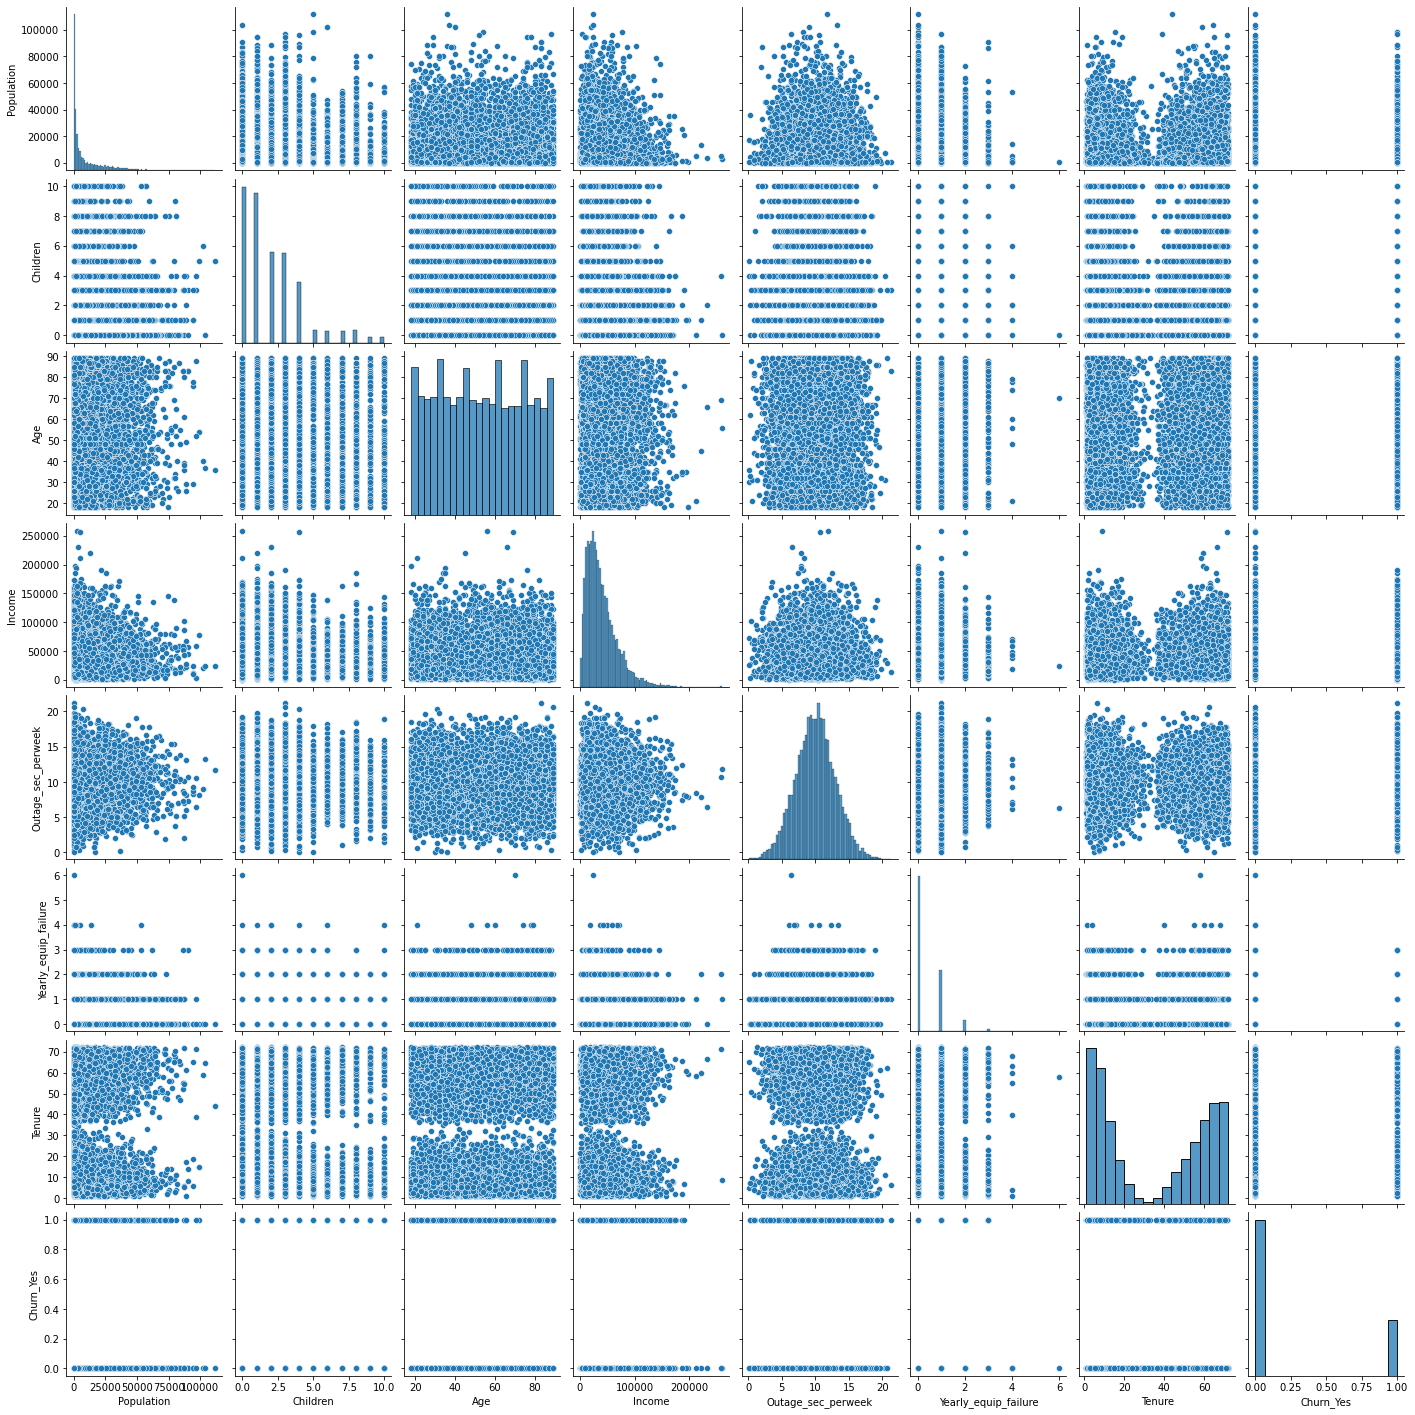

In [9]:
sns.pairplot(df_dummies[['Population','Children','Age','Income','Outage_sec_perweek','Yearly_equip_failure','Tenure','Churn_Yes']])

Notes of interest:<br>
- Age does appear to be an even distribution
- Outage has a normal distribution
- No clear cut areas of correlation in the variables observed

### 3.  Provide the code used to perform the prediction analysis.

In [10]:
# Load the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Declare the decision tree and parameter grid
dt = DecisionTreeClassifier()
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

# Instantiate the Grid Search and fit it to the training data
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, 
                       scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Output the best hyperparameters and resulting MSE
print('Our best set of hyperparameters was:              ', grid_dt.best_params_)
print('Our best mean squared error on training data was: ', grid_dt.best_score_ * -1)

Our best set of hyperparameters was:               {'max_depth': 6}
Our best mean squared error on training data was:  0.12375


Text(0.5, 257.44, 'Predicted label')

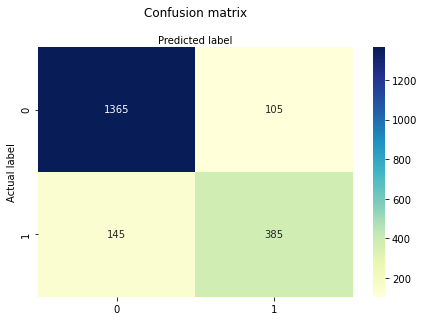

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_squared_error as mse

# Get the best model and predict with it
best_dt = grid_dt.best_estimator_
y_pred = best_dt.predict(X_test)

# Build a confusion matrix by comparing actuals with predictions (in our test set)
con_matrix = confusion_matrix(y_test, y_pred)

# Build a plot for the confusion matrix 
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Fill it with a heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
# Display the final results using unseen data (the test set)
print('Accuracy:           ', acc(y_test, y_pred))
print('Mean Squared Error: ', mse(y_test, y_pred))

Accuracy:            0.875
Mean Squared Error:  0.125


---

## Part V: Data Summary and Implications


### 1.  Explain the accuracy and the mean squared error (MSE) of your prediction model.

**The Accuracy of our model is 0.876.**
This value is calculated by dividing the true positives by the total number of positives, both true and false.  This value means that our model should accurately predict a customer likely to churn 87.6% of the time.

**The mean squared error for our model is 0.124.**
This is an estimator that describes how close our predictions are to the actual values.  This is calculated by squaring the difference and taking the mean.  The squaring accomplished two factors - it makes sure all values are positive and therefore don't cancel out, and it applies an exponentially heavier weight to points that are farther off.  (freeCodeCamp.org, 2018)

### 2.  Discuss the results and implications of your prediction analysis.

Based on our Accuracy and MSE, our model can predict the customers that will churn 87.6% of the time.  This would be a good starter model for predictions.  There are some limitations (described in the next section).

### 3.  Discuss one limitation of your data analysis.

There are multiple limitations of decision trees.  The most basic is the fact that they can't truely predict any value in a continuous range.  Instead they can create "buckets" of predictions that go to a single value ("leaf").  This is not a concern in our instance, because we are predicting a categorical value.

Other factors that would affect our analysis are the following (Wikipedia contributors, 2021) -
 - Decision tree can vary wildly based on slight changes to the inputs
 - There are usually multiple model types that perform better, including Random Forests
 - For categorical predictions, information gain is biased toward the categories with more inputs

### 4.  Recommend a course of action for the real-world organizational situation based on your results and implications discussed.

I would recommend that we implement feature reduction and attempt Random Forests before deciding on an initial model.  Although this model performs relatively well, there is a likely probability that we could reduce the features needed and get a better performing model in a short amount of time.

---

## Part VI: Sources


### Theory

Rawale, S. (2018, June 14). Understanding Decision Tree, Algorithm, Drawbacks and Advantages. Medium. https://medium.com/@sagar.rawale3/understanding-decision-tree-algorithm-drawbacks-and-advantages-4486efa6b8c3

Bhattacharyya, M. (2020, July 15). 3 Things You Need To Know Before You Train-Test Split. Medium. https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50

freeCodeCamp.org. (2018, October 8). Machine learning: an introduction to mean squared error and regression lines. https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

Wikipedia contributors. (2021, March 20). Decision tree. Wikipedia. https://en.wikipedia.org/wiki/Decision_tree


### Code

ipython notebook pandas max allowable columns. (2014, November 27). Stack Overflow. https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns

pandas.get_dummies — pandas 1.2.3 documentation. (n.d.). Pandas Documentation. Retrieved April 5, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html